# Import packages 

In [115]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline



In [116]:
df1 = pd.read_csv("/Users/DataSci/Desktop/Flatiron/Assignments/Phase_4_Proj/apple_goog.csv", index_col = 0)

In [117]:
df1.head(10)

,date,name,username,retweets_count,search_term,likes_count,language,c_tweet
1,2020-11-28,HyperNavJack27,jack_mangano,0,apple silicon,10,en,borderlands in on apple silicon yes yes it pla...
4,2020-11-28,Erik Engheim,erikengheim,0,apple silicon,1,en,mac mini vs mac pro interesting review of pros...
5,2020-11-28,Armando Monroy,ratzo,0,apple silicon,2,en,and can only imagine what the apple silicon fo...
7,2020-11-28,Matthew S. Smith,matt_on_tech,1,apple silicon,4,en,to repeat something said at the debut if apple...
10,2020-11-28,Danel Omen ➐ he/him.®️,heck_wtf,0,apple silicon,0,en,is not the problem pixel size is the problem a...
13,2020-11-28,Chris Short,chrisshort,0,apple silicon,2,en,recommended read apple silicon developer persp...
14,2020-11-28,Ian W. Yeo,ianyeo,0,apple silicon,1,en,imagining the possibilities with apple silicon...
17,2020-11-28,fabdub,fabdub,0,apple silicon,0,en,cardhop with apple silicon native coming
18,2020-11-28,Markus Rudel,rudelm,0,apple silicon,1,en,interesting blog post on the new apple silicon...
19,2020-11-28,Ahmed Ouardani,ahmedouardani1,0,apple silicon,1,en,before you jump like crazy on new mac chip goo...


In [118]:
df1.reset_index(drop=True, inplace=True)

In [119]:
df1.shape


(678730, 8)

In [120]:
df1.isnull().sum()

date               0
name              38
username           0
retweets_count     0
search_term        0
likes_count        0
language           0
c_tweet            6
dtype: int64

In [121]:
df1.dropna(inplace = True)

In [122]:
df1.describe()

,retweets_count,likes_count
count,678686.000000,678686.000000
mean,1.585172,11.665686
std,56.823221,351.834219
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,1.000000
max,17446.000000,91917.000000


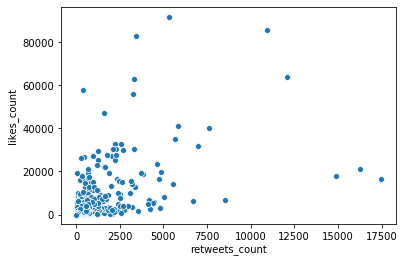

In [123]:
sns.scatterplot(x=df1["retweets_count"], y=df1["likes_count"]);

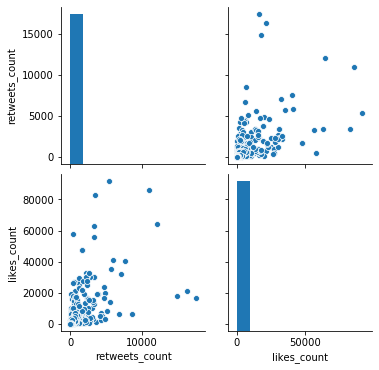

In [124]:
sns.pairplot(df1);

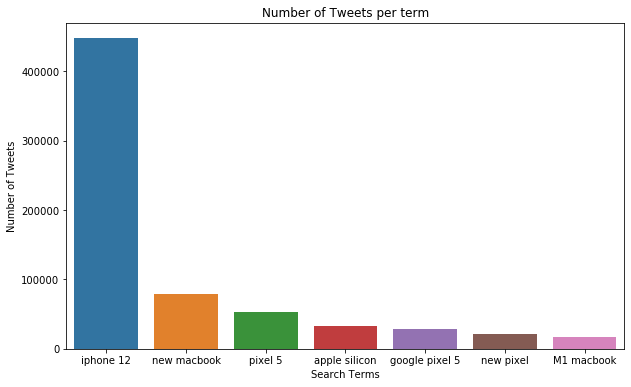

In [125]:
x=df1["search_term"].value_counts().index.to_list()

y = df1["search_term"].value_counts().to_list()

fig, ax = plt.subplots(figsize=(10,6))
sns.barplot(x=x, y=y)
plt.title("Number of Tweets per term")
plt.xlabel("Search Terms")
plt.ylabel("Number of Tweets");

In [126]:
df = df1.copy()

# Import packages for NLP

In [127]:
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.feature_extraction.text import TfidfTransformer
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.model_selection import train_test_split
from matplotlib import cm
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import f1_score
from sklearn.naive_bayes import MultinomialNB


nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/DataSci/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/DataSci/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/DataSci/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/DataSci/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/DataSci/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [128]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [129]:
df.head()

,date,name,username,retweets_count,search_term,likes_count,language,c_tweet
0,2020-11-28,HyperNavJack27,jack_mangano,0,apple silicon,10,en,borderlands in on apple silicon yes yes it pla...
1,2020-11-28,Erik Engheim,erikengheim,0,apple silicon,1,en,mac mini vs mac pro interesting review of pros...
2,2020-11-28,Armando Monroy,ratzo,0,apple silicon,2,en,and can only imagine what the apple silicon fo...
3,2020-11-28,Matthew S. Smith,matt_on_tech,1,apple silicon,4,en,to repeat something said at the debut if apple...
4,2020-11-28,Danel Omen ➐ he/him.®️,heck_wtf,0,apple silicon,0,en,is not the problem pixel size is the problem a...


In [130]:
df.drop_duplicates(subset='c_tweet', inplace = True)

In [131]:
len(df["c_tweet"])

459839

# Stopwords created

In [132]:
stop_words=list(set(stopwords.words("english")))

In [133]:
len(stop_words)

179

In [134]:
stop_words.extend(["ll", "please retweet", "help rt", "visit us", "please subscribe", "for sale", "enter here", "to win", "from iphone", "huge giveaway", "new arrival", "win an", "unlocked now", "new available", "giveaway", "subscribe", "retweet", "easter egg"])

In [135]:

eda_stopwords = ["iphone", "iphone pro", "pro max", "youtube", "youtuber", "youtubers", 
                 "also", "asap", "hmmm","hello", "haha", "dont", "imac", "ipad", 
                 "ipadair", "ipads", "iphonecase", "iphonemini", "iphonepro", "iphonepromax", 
                 "iphones", "iphoneth", "ipod",  "lmao", "lmfao", "macbook", "macbookair",
                 "macbookpro", "macbooks", "macosbigsur", "macmini", "magsafe", 
                 "okay", "promax", "wahala", "wont", 'yall','yeah', 'apple', 'skin', 'tone', "man", "pro", "face", "loudly",]

stop_words.extend(eda_stopwords)

In [136]:
stop_words

['just',
 't',
 "aren't",
 'mustn',
 "won't",
 'when',
 'having',
 'any',
 'do',
 'an',
 "you've",
 'under',
 'they',
 'other',
 'be',
 'why',
 'for',
 'me',
 'this',
 'about',
 'whom',
 "weren't",
 'hers',
 'y',
 'where',
 'after',
 'its',
 's',
 'couldn',
 'in',
 "you'll",
 'a',
 'further',
 'both',
 "didn't",
 'wasn',
 'does',
 'is',
 "couldn't",
 'from',
 'hasn',
 'needn',
 'their',
 'didn',
 'shan',
 'am',
 'over',
 'being',
 'nor',
 'who',
 'will',
 'has',
 'between',
 'd',
 'them',
 'while',
 'you',
 'o',
 "haven't",
 'hadn',
 'but',
 'some',
 "it's",
 "wasn't",
 'at',
 'if',
 'it',
 'out',
 "don't",
 'yourselves',
 "should've",
 'up',
 'these',
 'again',
 'into',
 'him',
 'yourself',
 'the',
 'above',
 'have',
 'until',
 'than',
 'that',
 'on',
 'myself',
 'herself',
 "mustn't",
 'before',
 'once',
 'same',
 'won',
 'or',
 'isn',
 'no',
 'weren',
 "you'd",
 'he',
 'then',
 "doesn't",
 "that'll",
 'haven',
 'against',
 'during',
 "shan't",
 'been',
 'most',
 'what',
 'my',
 "she

In [137]:
len(stop_words)

242

In [138]:
len(df["c_tweet"])

459839

# Tokenize, Lemmatize and remove stopwords

In [139]:
import nltk
#tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()
tokenizer = nltk.tokenize.TweetTokenizer()
#stemming = nltk.stem.PorterStemmer()

In [140]:
def lemmatize_text(text):
     return [lemmatizer.lemmatize(word.replace(" ", "")) for word in tokenizer.tokenize(text)]
#    return [stemming.stem(word) for word in tokenizer.tokenize(text)]

In [141]:
#tokenize and lemmatize words
df["tokenized"] = df.c_tweet.apply(lemmatize_text)

In [142]:
# removes stopwords from the cleaned texts
df["not_filtered"] = df['tokenized'].apply(lambda x: [item for item in x if item not in stop_words and len(item)>2])

In [143]:
def unlist(x):
    return ", ".join(x)

In [144]:
df["filtered"] = df.not_filtered.apply(unlist)
#df.drop(columns = ["filtered", "cleaned"], inplace = True)

In [145]:
df.head()

,date,name,username,retweets_count,search_term,likes_count,language,c_tweet,tokenized,not_filtered,filtered
0,2020-11-28,HyperNavJack27,jack_mangano,0,apple silicon,10,en,borderlands in on apple silicon yes yes it pla...,"[borderland, in, on, apple, silicon, yes, yes,...","[borderland, silicon, yes, yes, playable]","borderland, silicon, yes, yes, playable"
1,2020-11-28,Erik Engheim,erikengheim,0,apple silicon,1,en,mac mini vs mac pro interesting review of pros...,"[mac, mini, v, mac, pro, interesting, review, ...","[mac, mini, mac, interesting, review, con, app...","mac, mini, mac, interesting, review, con, appl..."
2,2020-11-28,Armando Monroy,ratzo,0,apple silicon,2,en,and can only imagine what the apple silicon fo...,"[and, can, only, imagine, what, the, apple, si...","[imagine, silicon, capable]","imagine, silicon, capable"
3,2020-11-28,Matthew S. Smith,matt_on_tech,1,apple silicon,4,en,to repeat something said at the debut if apple...,"[to, repeat, something, said, at, the, debut, ...","[repeat, something, said, debut, silicon, cont...","repeat, something, said, debut, silicon, conti..."
4,2020-11-28,Danel Omen ➐ he/him.®️,heck_wtf,0,apple silicon,0,en,is not the problem pixel size is the problem a...,"[is, not, the, problem, pixel, size, is, the, ...","[problem, pixel, size, problem, intel, problem...","problem, pixel, size, problem, intel, problem,..."


# Tag Sentiment

In [146]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

def sentiment_analyzer_scores(sentence):

    score = analyzer.polarity_scores(sentence)
    

    if score['compound'] >= .05:
        sent = 'positive'

    
    elif score['compound'] <= -.05:
        sent = 'negative'
       
    else:
        sent = 'neutral'
        

    return sent

In [147]:
df['sentiment'] = df.c_tweet.apply(sentiment_analyzer_scores)

In [148]:
df.sentiment.value_counts(normalize=True)

positive    0.464519
neutral     0.354165
negative    0.181316
Name: sentiment, dtype: float64

In [149]:
df.head(5)

,date,name,username,retweets_count,search_term,likes_count,language,c_tweet,tokenized,not_filtered,filtered,sentiment
0,2020-11-28,HyperNavJack27,jack_mangano,0,apple silicon,10,en,borderlands in on apple silicon yes yes it pla...,"[borderland, in, on, apple, silicon, yes, yes,...","[borderland, silicon, yes, yes, playable]","borderland, silicon, yes, yes, playable",positive
1,2020-11-28,Erik Engheim,erikengheim,0,apple silicon,1,en,mac mini vs mac pro interesting review of pros...,"[mac, mini, v, mac, pro, interesting, review, ...","[mac, mini, mac, interesting, review, con, app...","mac, mini, mac, interesting, review, con, appl...",positive
2,2020-11-28,Armando Monroy,ratzo,0,apple silicon,2,en,and can only imagine what the apple silicon fo...,"[and, can, only, imagine, what, the, apple, si...","[imagine, silicon, capable]","imagine, silicon, capable",positive
3,2020-11-28,Matthew S. Smith,matt_on_tech,1,apple silicon,4,en,to repeat something said at the debut if apple...,"[to, repeat, something, said, at, the, debut, ...","[repeat, something, said, debut, silicon, cont...","repeat, something, said, debut, silicon, conti...",neutral
4,2020-11-28,Danel Omen ➐ he/him.®️,heck_wtf,0,apple silicon,0,en,is not the problem pixel size is the problem a...,"[is, not, the, problem, pixel, size, is, the, ...","[problem, pixel, size, problem, intel, problem...","problem, pixel, size, problem, intel, problem,...",negative


# Seperate DataFrames based on search term

In [150]:
app_sil_df = df[df.search_term=="apple silicon"]
google_pixel_5_df = df[df.search_term=="google pixel 5"]
m1_macbook_df = df[df.search_term=="M1 macbook"]
new_macbook_df = df[df.search_term=="new macbook"]
new_pixel_df = df[df.search_term=="new pixel"]
pixel_5_df = df[df.search_term=="pixel 5"]
iphone_12_df = df[df.search_term=="iphone 12"]


In [151]:
app_frames = [app_sil_df,
m1_macbook_df,
new_macbook_df,
iphone_12_df]

goo_frames = [google_pixel_5_df,
new_pixel_df,
pixel_5_df]

apple_df = pd.concat(app_frames, ignore_index = True)
google_df = pd.concat(goo_frames, ignore_index = True)

In [152]:
apple_df.dtypes

date              object
name              object
username          object
retweets_count     int64
search_term       object
likes_count        int64
language          object
c_tweet           object
tokenized         object
not_filtered      object
filtered          object
sentiment         object
dtype: object

In [153]:
#FreqDist() goes here but idk how to go about it... 
#do we make FreqDist for each row? 
#or can we do it for each sentiment? 
#or for each search term? 

In [154]:
testing = apple_df.filtered

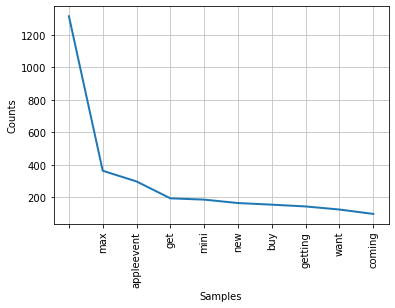

In [155]:
fdist=FreqDist(testing)
fdist.plot(10)

In [156]:
fdist.elements

<bound method Counter.elements of FreqDist({'': 1315, 'max': 363, 'appleevent': 297, 'get': 193, 'mini': 185, 'new': 164, 'buy': 154, 'getting': 143, 'want': 124, 'coming': 97, ...})>

In [157]:
apple_df

,date,name,username,retweets_count,search_term,likes_count,language,c_tweet,tokenized,not_filtered,filtered,sentiment
0,2020-11-28,HyperNavJack27,jack_mangano,0,apple silicon,10,en,borderlands in on apple silicon yes yes it pla...,"[borderland, in, on, apple, silicon, yes, yes,...","[borderland, silicon, yes, yes, playable]","borderland, silicon, yes, yes, playable",positive
1,2020-11-28,Erik Engheim,erikengheim,0,apple silicon,1,en,mac mini vs mac pro interesting review of pros...,"[mac, mini, v, mac, pro, interesting, review, ...","[mac, mini, mac, interesting, review, con, app...","mac, mini, mac, interesting, review, con, appl...",positive
2,2020-11-28,Armando Monroy,ratzo,0,apple silicon,2,en,and can only imagine what the apple silicon fo...,"[and, can, only, imagine, what, the, apple, si...","[imagine, silicon, capable]","imagine, silicon, capable",positive
3,2020-11-28,Matthew S. Smith,matt_on_tech,1,apple silicon,4,en,to repeat something said at the debut if apple...,"[to, repeat, something, said, at, the, debut, ...","[repeat, something, said, debut, silicon, cont...","repeat, something, said, debut, silicon, conti...",neutral
4,2020-11-28,Danel Omen ➐ he/him.®️,heck_wtf,0,apple silicon,0,en,is not the problem pixel size is the problem a...,"[is, not, the, problem, pixel, size, is, the, ...","[problem, pixel, size, problem, intel, problem...","problem, pixel, size, problem, intel, problem,...",negative
...,...,...,...,...,...,...,...,...,...,...,...,...
407110,2020-09-01 00:00:00,Chihibot,chihibot,0,iphone 12,0,en,new restoration project coming on sunday ll fi...,"[new, restoration, project, coming, on, sunday...","[new, restoration, project, coming, sunday, fi...","new, restoration, project, coming, sunday, fin...",negative
407111,2020-09-01 00:00:00,Yuyo™,alacraneros47,0,iphone 12,0,en,drop the new iphone already phone less face wi...,"[drop, the, new, iphone, already, phone, le, f...","[drop, new, already, phone, steam, nose]","drop, new, already, phone, steam, nose",negative
407112,2020-09-01 00:00:00,Grégory Thiell 🧢🌿🚗⚡️,gthiell,0,iphone 12,0,en,ll upgrade my iphone pro max to iphone if they...,"[ll, upgrade, my, iphone, pro, max, to, iphone...","[upgrade, max, found, way, get, rid, notch]","upgrade, max, found, way, get, rid, notch",neutral
407113,2020-09-01 00:00:00,ずみ@zoomishi,zoomishi,0,iphone 12,0,en,rumor airtags could launch alongside iphone in...,"[rumor, airtags, could, launch, alongside, iph...","[rumor, airtags, could, launch, alongside, sec...","rumor, airtags, could, launch, alongside, seco...",neutral


In [158]:
apple_tweets = apple_df["not_filtered"]

In [159]:
apple_tweets[:5]

0            [borderland, silicon, yes, yes, playable]
1    [mac, mini, mac, interesting, review, con, app...
2                          [imagine, silicon, capable]
3    [repeat, something, said, debut, silicon, cont...
4    [problem, pixel, size, problem, intel, problem...
Name: not_filtered, dtype: object

# Bag of Words on the filtered column

In [160]:
import gensim

In [161]:
# this will tag every word in the variable apple_tweets and give it a numer. 

dictionary = gensim.corpora.Dictionary(apple_tweets)



count = 0
for k, v in dictionary.iteritems():
    print(k, v)
    count += 1
    if count > 50:
        break

0 borderland
1 playable
2 silicon
3 yes
4 applesilicon
5 based
6 con
7 going
8 interesting
9 mac
10 macpro
11 mini
12 monster
13 review
14 capable
15 imagine
16 continues
17 debut
18 exclusive
19 hard
20 hardware
21 laptop
22 level
23 market
24 offer
25 particularly
26 performance
27 repeat
28 said
29 something
30 time
31 back
32 bigger
33 bump
34 fit
35 intel
36 lid
37 pixel
38 problem
39 put
40 sensor
41 size
42 tiny
43 way
44 developer
45 devopsish
46 perspective
47 read
48 recommended
49 computer
50 could


In [162]:
len(dictionary)

99929

In [163]:
# dictionary is then filtered to remove that appear in more than 50% and only keep the first 10,000
dictionary.filter_extremes(no_above=0.5)

In [164]:
# applying the dictionary to the apple tweets to create a sparce matrix/vector

sparce_matrix = [dictionary.doc2bow(doc) for doc in apple_tweets]

In [165]:
sparce_matrix

[[(0, 1), (1, 1), (2, 1), (3, 2)],
 [(4, 1),
  (5, 1),
  (6, 1),
  (7, 1),
  (8, 1),
  (9, 2),
  (10, 1),
  (11, 1),
  (12, 1),
  (13, 1)],
 [(2, 1), (14, 1), (15, 1)],
 [(2, 1),
  (9, 1),
  (16, 1),
  (17, 1),
  (18, 1),
  (19, 1),
  (20, 1),
  (21, 1),
  (22, 1),
  (23, 1),
  (24, 1),
  (25, 1),
  (26, 1),
  (27, 1),
  (28, 1),
  (29, 1),
  (30, 1)],
 [(2, 1),
  (9, 1),
  (31, 1),
  (32, 1),
  (33, 1),
  (34, 1),
  (35, 1),
  (36, 1),
  (37, 1),
  (38, 3),
  (39, 1),
  (40, 1),
  (41, 1),
  (42, 1),
  (43, 1)],
 [(2, 1), (44, 1), (45, 1), (46, 1), (47, 1), (48, 1)],
 [(2, 2), (49, 1), (50, 1), (51, 1), (52, 1), (53, 1), (54, 1), (55, 1)],
 [(2, 1), (56, 1), (57, 1)],
 [(2, 1), (8, 1), (9, 1), (58, 1), (59, 1), (60, 1)],
 [(4, 1),
  (9, 2),
  (59, 1),
  (61, 1),
  (62, 1),
  (63, 1),
  (64, 1),
  (65, 2),
  (66, 1),
  (67, 1),
  (68, 1),
  (69, 1),
  (70, 1),
  (71, 1),
  (72, 1),
  (73, 1),
  (74, 1),
  (75, 1),
  (76, 1),
  (77, 1),
  (78, 1),
  (79, 1)],
 [(2, 1), (80, 1), (81, 1)]

In [166]:
apple_tweets[6]

['imagining',
 'possibility',
 'silicon',
 'feature',
 'could',
 'silicon',
 'enable',
 'computer',
 'share']

In [167]:
sparce_matrix[6]

[(2, 2), (49, 1), (50, 1), (51, 1), (52, 1), (53, 1), (54, 1), (55, 1)]

In [168]:
bow=pd.DataFrame(sparce_matrix)


In [169]:
bow_doc = sparce_matrix[6]
for i in range(len(bow_doc)):
    print("Word {} (\"{}\") appears {} time.".format(bow_doc[i][0], 
                                               dictionary[bow_doc[i][0]], 
                                                bow_doc[i][1]))


Word 2 ("silicon") appears 2 time.
Word 49 ("computer") appears 1 time.
Word 50 ("could") appears 1 time.
Word 51 ("enable") appears 1 time.
Word 52 ("feature") appears 1 time.
Word 53 ("imagining") appears 1 time.
Word 54 ("possibility") appears 1 time.
Word 55 ("share") appears 1 time.


# TFIDF corpus

In [170]:
from gensim import corpora, models
tfidf = models.TfidfModel(sparce_matrix)
corpus_tfidf = tfidf[sparce_matrix]

from pprint import pprint

for doc in corpus_tfidf:
    pprint(doc)
    break
        

[(0, 0.6188552962637079),
 (1, 0.5518780042177706),
 (2, 0.15317275868568905),
 (3, 0.5375750149919399)]


In [171]:
apple_tweets[0]

['borderland', 'silicon', 'yes', 'yes', 'playable']

In [172]:
corpus_tfidf[0]

[(0, 0.6188552962637079),
 (1, 0.5518780042177706),
 (2, 0.15317275868568905),
 (3, 0.5375750149919399)]

# LDA Model

In [173]:
%%time
lda_model = gensim.models.LdaMulticore(sparce_matrix, num_topics=10, id2word=dictionary, passes=10, workers=8, random_state=1)

CPU times: user 2min 48s, sys: 40.5 s, total: 3min 29s
Wall time: 8min 14s


In [174]:
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}\n'.format(idx, topic))

Topic: 0 
Words: 0.059*"hand" + 0.046*"medium" + 0.039*"please" + 0.038*"light" + 0.022*"dark" + 0.013*"facepalming" + 0.012*"max" + 0.012*"shrugging" + 0.011*"thank" + 0.011*"new"

Topic: 1 
Words: 0.079*"heart" + 0.074*"smiling" + 0.073*"eye" + 0.039*"floor" + 0.032*"rolling" + 0.021*"max" + 0.019*"red" + 0.019*"laughing" + 0.018*"selector" + 0.017*"laughingrolling"

Topic: 2 
Words: 0.045*"camera" + 0.039*"video" + 0.029*"max" + 0.026*"new" + 0.023*"amp" + 0.016*"lidar" + 0.016*"mobile" + 0.014*"review" + 0.013*"via" + 0.011*"best"

Topic: 3 
Words: 0.032*"new" + 0.030*"silicon" + 0.026*"mac" + 0.016*"air" + 0.013*"chip" + 0.010*"support" + 0.008*"app" + 0.007*"work" + 0.006*"update" + 0.006*"intel"

Topic: 4 
Words: 0.053*"case" + 0.043*"blue" + 0.030*"max" + 0.025*"free" + 0.024*"color" + 0.023*"win" + 0.018*"phone" + 0.018*"samsung" + 0.014*"note" + 0.013*"pacific"

Topic: 5 
Words: 0.036*"buy" + 0.033*"price" + 0.033*"cry" + 0.029*"charger" + 0.028*"new" + 0.016*"come" + 0.013*"

## Running LDA model on the TFIDF generated corpus 

In [175]:
%%time
lda_model_tfidf = gensim.models.LdaMulticore(corpus_tfidf, num_topics=10, id2word=dictionary, passes=10, workers=8, random_state=1)

CPU times: user 8min 34s, sys: 1min, total: 9min 35s
Wall time: 12min 28s


In [176]:
for idx, topic in lda_model_tfidf.print_topics(-1):
    print('Topic: {} \n\Word: {}\n'.format(idx, topic))

Topic: 0 
\Word: 0.025*"hand" + 0.024*"medium" + 0.019*"light" + 0.017*"unboxing" + 0.016*"dark" + 0.014*"video" + 0.013*"review" + 0.011*"facepalming" + 0.010*"shrugging" + 0.009*"wallpaper"

Topic: 1 
\Word: 0.038*"blue" + 0.037*"smiling" + 0.035*"eye" + 0.035*"heart" + 0.023*"cry" + 0.023*"max" + 0.017*"rolling" + 0.016*"floor" + 0.016*"color" + 0.015*"pacific"

Topic: 2 
\Word: 0.013*"camera" + 0.011*"appleevent" + 0.009*"iphoneseries" + 0.009*"lidar" + 0.009*"pointing" + 0.008*"index" + 0.008*"max" + 0.008*"hdr" + 0.007*"fire" + 0.007*"new"

Topic: 3 
\Word: 0.013*"silicon" + 0.012*"new" + 0.011*"mac" + 0.010*"air" + 0.010*"chip" + 0.006*"appleevent" + 0.005*"preordered" + 0.005*"faster" + 0.004*"intel" + 0.004*"see"

Topic: 4 
\Word: 0.020*"win" + 0.016*"free" + 0.012*"help" + 0.010*"please" + 0.008*"mark" + 0.007*"check" + 0.007*"give" + 0.007*"buy" + 0.007*"dey" + 0.006*"scanner"

Topic: 5 
\Word: 0.019*"order" + 0.019*"pre" + 0.011*"max" + 0.009*"available" + 0.008*"september"

In [177]:
corpus_transformed = lda_model_tfidf[sparce_matrix]

In [178]:
len(corpus_transformed)

407115

In [179]:
corpus_transformed[0]

[(0, 0.018708061),
 (1, 0.6266485),
 (2, 0.01871781),
 (3, 0.22367583),
 (4, 0.018707989),
 (5, 0.018708277),
 (6, 0.018709064),
 (7, 0.018708345),
 (8, 0.018708268),
 (9, 0.01870792)]

In [180]:
%%time

# convert to dataframe
topics = [dict(x) for x in corpus_transformed]


CPU times: user 1min 43s, sys: 1.3 s, total: 1min 45s
Wall time: 1min 46s


In [181]:
# ran earlier with 5 passes 
topics[1]

{0: 0.10542129, 3: 0.8278842}

In [182]:
# ran earlier with 10 passes topics[1]

In [183]:
# convert list of lda topic weights to dataframe
lda_tfidf_df = pd.DataFrame(topics)

# rename columns
lda_tfidf_df.rename(columns={i: f'topic{i}' for i in range(10)}, inplace=True)

In [184]:
lda_tfidf_df

,topic0,topic1,topic2,topic3,topic4,topic5,topic6,topic7,topic8,topic9
0,0.018708,0.626656,0.018718,0.223669,0.018708,0.018708,0.018709,0.018708,0.018708,0.018708
1,0.105421,NaN,NaN,0.827884,NaN,NaN,NaN,NaN,NaN,NaN
2,0.025006,0.025006,0.025014,0.774932,0.025007,0.025006,0.025006,0.025008,0.025009,0.025006
3,NaN,NaN,NaN,0.797123,0.158403,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,0.287325,NaN,NaN,NaN,NaN,0.452186,0.221580
...,...,...,...,...,...,...,...,...,...,...
407110,NaN,NaN,NaN,NaN,NaN,NaN,0.930743,NaN,NaN,NaN
407111,0.014288,0.014288,0.014288,0.014288,0.014287,0.014288,0.014288,0.871410,0.014288,0.014288
407112,0.012503,0.012504,0.012503,0.012504,0.012503,0.012505,0.012503,0.697101,0.012505,0.202869
407113,0.010001,0.010001,0.010001,0.010001,0.010001,0.010001,0.909992,0.010001,0.010001,0.010001


In [185]:
print(len(apple_df))
print(len(lda_tfidf_df))

407115
407115


In [186]:
lda_tfidf_df.fillna(0, inplace=True)

lda_tfidf_df.head()

,topic0,topic1,topic2,topic3,topic4,topic5,topic6,topic7,topic8,topic9
0,0.018708,0.626656,0.018718,0.223669,0.018708,0.018708,0.018709,0.018708,0.018708,0.018708
1,0.105421,0.000000,0.000000,0.827884,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.025006,0.025006,0.025014,0.774932,0.025007,0.025006,0.025006,0.025008,0.025009,0.025006
3,0.000000,0.000000,0.000000,0.797123,0.158403,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.287325,0.000000,0.000000,0.000000,0.000000,0.452186,0.221580


In [187]:
main_df = pd.concat([apple_df, lda_tfidf_df], axis = 1)

In [188]:
# for index, score in sorted(lda_model_tfidf[bow_corpus[0]], key=lambda tup: -1*tup[1]):
#     print("\nScore: {}\t \nTopic: {}".format(score, lda_model_tfidf.print_topic(index, 10)))

In [189]:
main_df.head()

,date,name,username,retweets_count,search_term,likes_count,language,c_tweet,tokenized,not_filtered,...,topic0,topic1,topic2,topic3,topic4,topic5,topic6,topic7,topic8,topic9
0,2020-11-28,HyperNavJack27,jack_mangano,0,apple silicon,10,en,borderlands in on apple silicon yes yes it pla...,"[borderland, in, on, apple, silicon, yes, yes,...","[borderland, silicon, yes, yes, playable]",...,0.018708,0.626656,0.018718,0.223669,0.018708,0.018708,0.018709,0.018708,0.018708,0.018708
1,2020-11-28,Erik Engheim,erikengheim,0,apple silicon,1,en,mac mini vs mac pro interesting review of pros...,"[mac, mini, v, mac, pro, interesting, review, ...","[mac, mini, mac, interesting, review, con, app...",...,0.105421,0.000000,0.000000,0.827884,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,2020-11-28,Armando Monroy,ratzo,0,apple silicon,2,en,and can only imagine what the apple silicon fo...,"[and, can, only, imagine, what, the, apple, si...","[imagine, silicon, capable]",...,0.025006,0.025006,0.025014,0.774932,0.025007,0.025006,0.025006,0.025008,0.025009,0.025006
3,2020-11-28,Matthew S. Smith,matt_on_tech,1,apple silicon,4,en,to repeat something said at the debut if apple...,"[to, repeat, something, said, at, the, debut, ...","[repeat, something, said, debut, silicon, cont...",...,0.000000,0.000000,0.000000,0.797123,0.158403,0.000000,0.000000,0.000000,0.000000,0.000000
4,2020-11-28,Danel Omen ➐ he/him.®️,heck_wtf,0,apple silicon,0,en,is not the problem pixel size is the problem a...,"[is, not, the, problem, pixel, size, is, the, ...","[problem, pixel, size, problem, intel, problem...",...,0.000000,0.000000,0.000000,0.287325,0.000000,0.000000,0.000000,0.000000,0.452186,0.221580


In [190]:
main_df.drop(columns=["language", "name", "username", "tokenized", "not_filtered"], inplace=True)

In [191]:
main_df.head(2)

,date,retweets_count,search_term,likes_count,c_tweet,filtered,sentiment,topic0,topic1,topic2,topic3,topic4,topic5,topic6,topic7,topic8,topic9
0,2020-11-28,0,apple silicon,10,borderlands in on apple silicon yes yes it pla...,"borderland, silicon, yes, yes, playable",positive,0.018708,0.626656,0.018718,0.223669,0.018708,0.018708,0.018709,0.018708,0.018708,0.018708
1,2020-11-28,0,apple silicon,1,mac mini vs mac pro interesting review of pros...,"mac, mini, mac, interesting, review, con, appl...",positive,0.105421,0.000000,0.000000,0.827884,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [192]:
yes_retweet = []
for x in main_df["retweets_count"]:
    if x >= 1:
        yes_retweet.append(1)
    else: 
        yes_retweet.append(0)
        
        
main_df["yes_retweets"] = yes_retweet
#df.drop(columns = "retweets_count")
main_df.drop(columns = "retweets_count", inplace = True)

In [193]:
yes_likes = []
for x in main_df["likes_count"]:
    if x >= 1:
        yes_likes.append(1)
    else: 
        yes_likes.append(0)
        
        
main_df["yes_likes"] = yes_likes
#df.drop(columns = "retweets_count")
#main_df.drop(columns = "retweets_count", inplace = True)

main_df.head(2)

,date,search_term,likes_count,c_tweet,filtered,sentiment,topic0,topic1,topic2,topic3,topic4,topic5,topic6,topic7,topic8,topic9,yes_retweets,yes_likes
0,2020-11-28,apple silicon,10,borderlands in on apple silicon yes yes it pla...,"borderland, silicon, yes, yes, playable",positive,0.018708,0.626656,0.018718,0.223669,0.018708,0.018708,0.018709,0.018708,0.018708,0.018708,0,1
1,2020-11-28,apple silicon,1,mac mini vs mac pro interesting review of pros...,"mac, mini, mac, interesting, review, con, appl...",positive,0.105421,0.000000,0.000000,0.827884,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,1


In [194]:
main_df.dtypes

date             object
search_term      object
likes_count       int64
c_tweet          object
filtered         object
sentiment        object
topic0          float64
topic1          float64
topic2          float64
topic3          float64
topic4          float64
topic5          float64
topic6          float64
topic7          float64
topic8          float64
topic9          float64
yes_retweets      int64
yes_likes         int64
dtype: object

# Creating subjectivity score using Textblob

In [195]:
from textblob import TextBlob

In [196]:
main_df['subjectivity_score'] = main_df['filtered'].apply(lambda x: TextBlob(x).sentiment.subjectivity)

In [197]:
topic_df = main_df.iloc[:,6:16]
tes = topic_df.idxmax(axis=1)
main_df["test"]=tes

In [198]:
main_df.to_csv("main_df.csv")

In [199]:
main_df.columns[6:16]

Index(['topic0', 'topic1', 'topic2', 'topic3', 'topic4', 'topic5', 'topic6',
       'topic7', 'topic8', 'topic9'],
      dtype='object')

# EDA

In [200]:
main_df = pd.read_csv("main_df.csv", index_col = 0)

In [201]:
main_df.head()

,date,search_term,likes_count,c_tweet,filtered,sentiment,topic0,topic1,topic2,topic3,topic4,topic5,topic6,topic7,topic8,topic9,yes_retweets,yes_likes,subjectivity_score,test
0,2020-11-28,apple silicon,10,borderlands in on apple silicon yes yes it pla...,"borderland, silicon, yes, yes, playable",positive,0.018708,0.626656,0.018718,0.223669,0.018708,0.018708,0.018709,0.018708,0.018708,0.018708,0,1,0.0000,topic1
1,2020-11-28,apple silicon,1,mac mini vs mac pro interesting review of pros...,"mac, mini, mac, interesting, review, con, appl...",positive,0.105421,0.000000,0.000000,0.827884,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,1,0.5000,topic3
2,2020-11-28,apple silicon,2,and can only imagine what the apple silicon fo...,"imagine, silicon, capable",positive,0.025006,0.025006,0.025014,0.774932,0.025007,0.025006,0.025006,0.025008,0.025009,0.025006,0,1,0.4000,topic3
3,2020-11-28,apple silicon,4,to repeat something said at the debut if apple...,"repeat, something, said, debut, silicon, conti...",neutral,0.000000,0.000000,0.000000,0.797123,0.158403,0.000000,0.000000,0.000000,0.000000,0.000000,1,1,0.4375,topic3
4,2020-11-28,apple silicon,0,is not the problem pixel size is the problem a...,"problem, pixel, size, problem, intel, problem,...",negative,0.000000,0.000000,0.000000,0.287325,0.000000,0.000000,0.000000,0.000000,0.452186,0.221580,0,0,0.3500,topic8


In [202]:
main_df.describe()

,likes_count,topic0,topic1,topic2,topic3,topic4,topic5,topic6,topic7,topic8,topic9,yes_retweets,yes_likes,subjectivity_score
count,407115.000000,407115.000000,407115.000000,407115.000000,407115.000000,407115.000000,407115.000000,407115.000000,407115.000000,407115.000000,407115.000000,407115.000000,407115.000000,407115.000000
mean,10.241585,0.061925,0.084009,0.058222,0.124317,0.067729,0.106408,0.084292,0.220104,0.082645,0.094084,0.137566,0.458721,0.337984
std,215.642076,0.137441,0.177016,0.129684,0.227885,0.145753,0.203066,0.174971,0.285465,0.169662,0.186633,0.344444,0.498294,0.294543
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.011107,0.000000,0.010004,0.000000,0.011161,0.010002,0.010001,0.000000,0.000000,0.000000
50%,0.000000,0.014310,0.016666,0.014300,0.016684,0.016667,0.016673,0.016669,0.025012,0.016670,0.016671,0.000000,0.000000,0.375000
75%,2.000000,0.033336,0.033343,0.033329,0.089059,0.033337,0.050011,0.033346,0.427793,0.033343,0.050001,0.000000,1.000000,0.536364
max,56102.000000,0.981995,0.987500,0.980431,0.972711,0.962481,0.971866,0.963980,0.967847,0.967846,0.991105,1.000000,1.000000,1.000000


In [203]:
corr = main_df.corr()

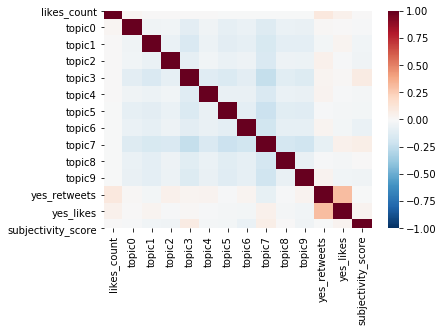

In [204]:
sns.heatmap(corr, vmin=-1, vmax=1, cmap="RdBu_r")

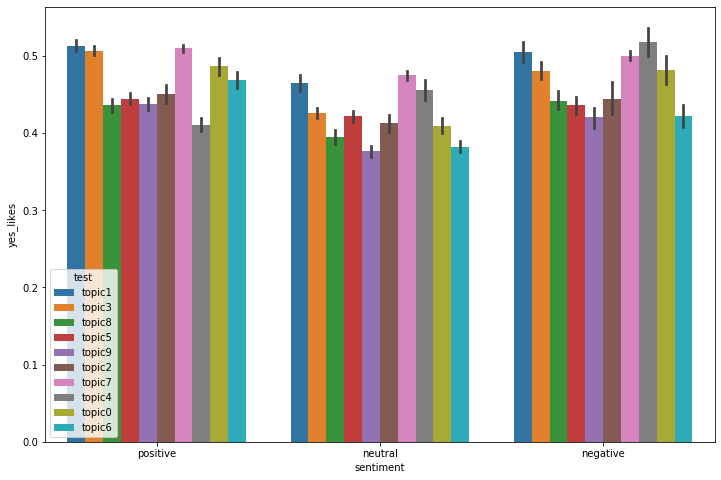

In [205]:
fig,ax = plt.subplots(figsize=(12,8))
sns.barplot(x = "sentiment", y= main_df["yes_likes"], data = main_df, hue = "test")

In [206]:
x = main_df.groupby("test")["sentiment"].value_counts(normalize=True).unstack()

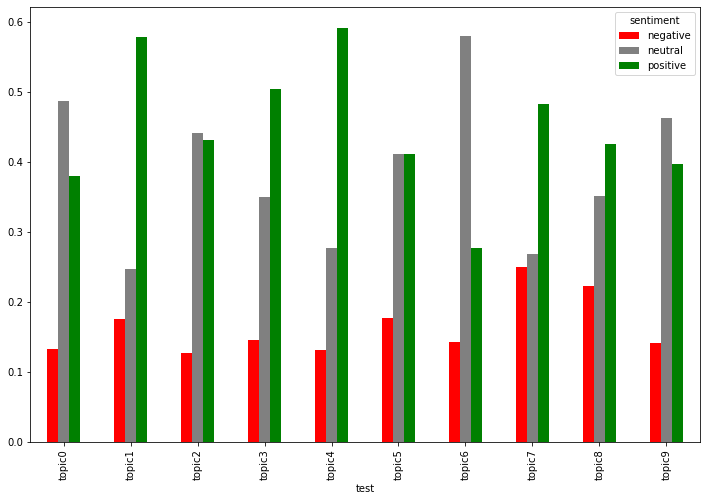

In [207]:

x.plot(kind = 'bar', figsize=(12,8), color =["red", "grey", "green"])

In [208]:
y = main_df.groupby("search_term")["sentiment"].value_counts(normalize=True).unstack()

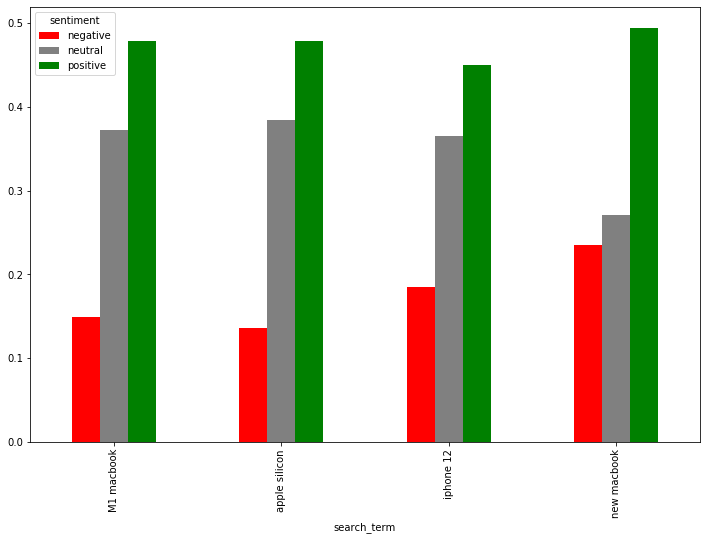

In [209]:
y.plot(kind = 'bar', figsize=(12,8), color =["red", "grey", "green"])

In [210]:
# loc search_term, make workcould

neg_macbook = main_df[(main_df["search_term"]=="new macbook") & (main_df["sentiment"]=="negative")]

In [211]:
text = neg_macbook.filtered.to_list()

In [212]:
text = " ".join(tweet for tweet in text)

In [213]:
from wordcloud import WordCloud

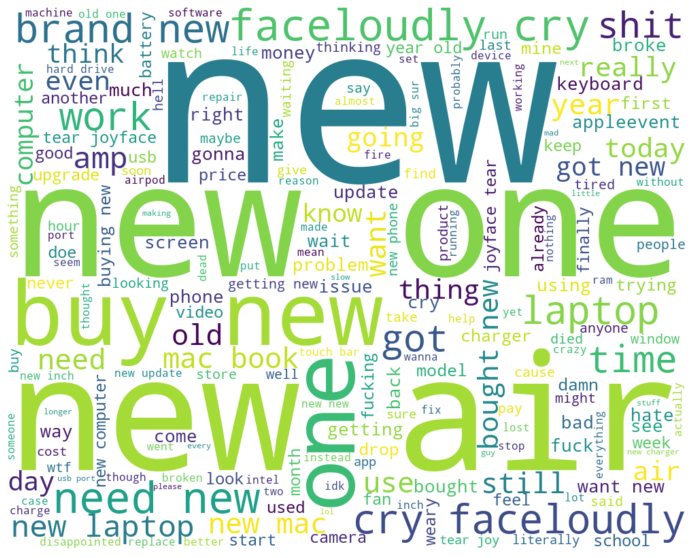

In [214]:
fig, ax = plt.subplots(figsize=(14,10))
wc = WordCloud(width = 1000, height = 800, max_words = 200, background_color = "white").generate(text)
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()
wc.to_file('neg_mackbook.png')

# Models

In [215]:
features = ["topic0", "topic1", "topic2", "topic3", "topic4", "topic5", "topic6", 
            "topic7", "topic8", "topic9", "yes_likes", "yes_retweets",
            "subjectivity_score"]

In [216]:
featured_df = main_df[features]

In [217]:
featured_df.head()

,topic0,topic1,topic2,topic3,topic4,topic5,topic6,topic7,topic8,topic9,yes_likes,yes_retweets,subjectivity_score
0,0.018708,0.626656,0.018718,0.223669,0.018708,0.018708,0.018709,0.018708,0.018708,0.018708,1,0,0.0000
1,0.105421,0.000000,0.000000,0.827884,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1,0,0.5000
2,0.025006,0.025006,0.025014,0.774932,0.025007,0.025006,0.025006,0.025008,0.025009,0.025006,1,0,0.4000
3,0.000000,0.000000,0.000000,0.797123,0.158403,0.000000,0.000000,0.000000,0.000000,0.000000,1,1,0.4375
4,0.000000,0.000000,0.000000,0.287325,0.000000,0.000000,0.000000,0.000000,0.452186,0.221580,0,0,0.3500


In [218]:
corr=featured_df.corr()

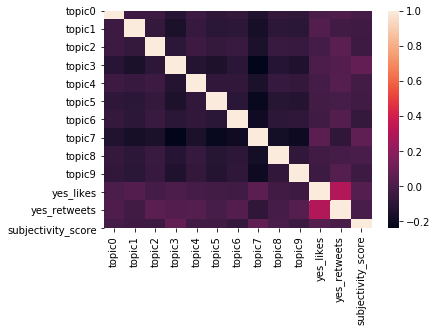

In [219]:
sns.heatmap(corr)

In [220]:
rf_feats = main_df.c_tweet.values
# rf_targets = apple_df.sentiment.values
tfidfconverter = TfidfVectorizer(max_features=2000, min_df=5, max_df=0.7, stop_words=stop_words)  
X = tfidfconverter.fit_transform(rf_feats).toarray()
# X_train, X_test, y_train, y_test = train_test_split(X, rf_targets, test_size=0.2, random_state=0)
tfidf_test_df = pd.DataFrame(X)
tfidf_test_df

/Users/DataSci/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:386: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['arrival', 'available', 'easter', 'egg', 'enter', 'help', 'huge', 'max', 'new', 'please', 'rt', 'sale', 'unlocked', 'us', 'visit', 'win'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


,0,1,2,3,4,5,6,7,8,9,...,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.952769,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
407110,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
407111,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
407112,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
407113,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [221]:
featured_df

,topic0,topic1,topic2,topic3,topic4,topic5,topic6,topic7,topic8,topic9,yes_likes,yes_retweets,subjectivity_score
0,0.018708,0.626656,0.018718,0.223669,0.018708,0.018708,0.018709,0.018708,0.018708,0.018708,1,0,0.000000
1,0.105421,0.000000,0.000000,0.827884,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1,0,0.500000
2,0.025006,0.025006,0.025014,0.774932,0.025007,0.025006,0.025006,0.025008,0.025009,0.025006,1,0,0.400000
3,0.000000,0.000000,0.000000,0.797123,0.158403,0.000000,0.000000,0.000000,0.000000,0.000000,1,1,0.437500
4,0.000000,0.000000,0.000000,0.287325,0.000000,0.000000,0.000000,0.000000,0.452186,0.221580,0,0,0.350000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
407110,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.930743,0.000000,0.000000,0.000000,0,0,0.784848
407111,0.014288,0.014288,0.014288,0.014288,0.014287,0.014288,0.014288,0.871410,0.014288,0.014288,0,0,0.454545
407112,0.012503,0.012504,0.012503,0.012504,0.012503,0.012505,0.012503,0.697101,0.012505,0.202869,0,0,0.000000
407113,0.010001,0.010001,0.010001,0.010001,0.010001,0.010001,0.909992,0.010001,0.010001,0.010001,0,0,0.083333


In [222]:
feats = pd.concat([featured_df, tfidf_test_df], axis = 1)

In [223]:
features = feats.values

In [224]:
targets = main_df.sentiment.values

In [225]:
feats.to_csv("features.csv")

In [226]:
print(features.shape, targets.shape)

(407115, 2013) (407115,)


In [227]:
# Train test split

X_train, X_test, y_train, y_test = train_test_split(feats, targets, test_size=0.2, random_state=0)

# Testing baseline

### Guassian Naive Bayes

In [228]:
from sklearn.naive_bayes import GaussianNB 
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [229]:
y_pred_NB = classifier.predict(X_test)
y_pred_NB


array(['negative', 'negative', 'positive', ..., 'neutral', 'neutral',
       'neutral'], dtype='<U8')

In [230]:
cm_NB = confusion_matrix(y_test, y_pred_NB) 
cm_NB

array([[ 9902,  3234,  1774],
       [ 2144, 26277,  1033],
       [ 7643,  5418, 23998]])

In [231]:
print("Accuracy is:", metrics.accuracy_score(y_test, y_pred_NB))

Accuracy is: 0.7390663571718065


In [232]:
print(classification_report(y_pred_NB, y_test))

              precision    recall  f1-score   support

    negative       0.66      0.50      0.57     19689
     neutral       0.89      0.75      0.82     34929
    positive       0.65      0.90      0.75     26805

    accuracy                           0.74     81423
   macro avg       0.73      0.72      0.71     81423
weighted avg       0.76      0.74      0.74     81423



### Decision Tree 

In [233]:
from sklearn.tree import DecisionTreeClassifier


In [234]:
dtc_classifier = DecisionTreeClassifier(random_state = 0)
dtc_classifier.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [235]:
y_pred_DT = dtc_classifier.predict(X_test)

In [236]:
print("Accuracy is:", metrics.accuracy_score(y_test, y_pred_DT))

Accuracy is: 0.7623398793952568


In [237]:
print(classification_report(y_pred_DT, y_test))

              precision    recall  f1-score   support

    negative       0.55      0.58      0.57     14118
     neutral       0.81      0.79      0.80     30319
    positive       0.81      0.81      0.81     36986

    accuracy                           0.76     81423
   macro avg       0.72      0.73      0.73     81423
weighted avg       0.76      0.76      0.76     81423



### Random Forest Classifier

In [238]:
from sklearn.ensemble import RandomForestClassifier

In [239]:
rfc_classifier = RandomForestClassifier(n_estimators = 300, criterion = "entropy", random_state = 0)

In [240]:
rfc_classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=300, random_state=0)

In [241]:
y_pred_RF = rfc_classifier.predict(X_test)

In [242]:
print(classification_report(y_pred_RF, y_test))

              precision    recall  f1-score   support

    negative       0.48      0.87      0.62      8239
     neutral       0.89      0.81      0.85     32383
    positive       0.90      0.82      0.85     40801

    accuracy                           0.82     81423
   macro avg       0.76      0.83      0.78     81423
weighted avg       0.85      0.82      0.83     81423

